# Evaluación básica del modelo de Clasificación de *COVID-19*

Esta es una pequeña demo de la evaluación del modelo generado en la tarea [Clasificador COVID-19.pdf](https://github.com/akua21/Trabajo-Final-AA/blob/master/Memoria/Clasificador%20COVID-19/Clasificador%20COVID-19.pdf).

In [1]:
import tensorflow as tf
import numpy as np
import os # Funciones del sistema operativo
from PIL import Image # Para obtener el valor de los pixeles de las imágenes
import matplotlib.pyplot as plt
import random as rng
from tensorflow.keras import models

## Cargar el Modelo ya existente

In [2]:
model = models.load_model('./modelo')

Se hace la misma división que en el modelo para comprobar si clasifica correctamente imágenes con las que ha entrenado e imágenes con las que no ha entrenado. 

In [3]:
IMG_SIZE = 500
className = ["blank", "other", "coronaviridae"]

In [4]:
trainingSet = []
evaluationSet = []

for folder in os.listdir('./images'):
    for i, img in enumerate(os.listdir('./images/' + folder)):
        imgClass = folder        
        path = os.path.join('./images/' + folder, img)
        imgData = Image.open(path)
        imgData = imgData.convert("L")
                
        imgData = imgData.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        imgData = np.array(imgData)
        
        if i % 10 < 8:
            trainingSet.append((imgData, imgClass))
        else:
            evaluationSet.append((imgData, imgClass))     

In [5]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [6]:
trainingData = []
trainingLabel = []

testData = []
testLabel = []

for element in trainingSet:
    trainingData.append(np.reshape(element[0], (IMG_SIZE, IMG_SIZE, 1)))
    trainingLabel.append(className.index(element[1]))

for element in evaluationSet:
    testData.append(np.reshape(element[0], (IMG_SIZE, IMG_SIZE, 1)))
    testLabel.append(className.index(element[1]))

trainingData = np.array(trainingData)
trainingLabel = np.array(trainingLabel)

testData = np.array(testData)
testLabel = np.array(testLabel)

## Evaluar con imágenes de entrenamiento

Esta evaluación no es muy decisiva, ya que puede dar un resultado muy elevado de aciertos, pero estar cometiendo *overfitting*. De todas formas, es útil para comprobar si el modelo ha aprendido o no.

In [7]:
loss, acc = model.evaluate(trainingData,  trainingLabel, verbose=0)

In [8]:
print("Precisión del modelo sobre sus datos de entrenamiento: " +  str(acc*100) +  "%")

Precisión del modelo sobre sus datos de entrenamiento: 94.11764740943909%


Confianza de blank: 0.99966526
Confianza de other: 1.2846392e-07
Confianza de coronaviridae: 0.00033458366

Clase con mayor confianza:  blank


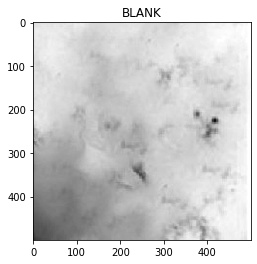

In [9]:
rng = np.random.randint(len(trainingSet))

plt.imshow(trainingSet[rng][0], cmap = 'gist_gray')
plt.title(trainingSet[rng][1].upper())

prediction = probability_model.predict(np.reshape(trainingSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])

Confianza de blank: 0.99999917
Confianza de other: 1.1879426e-08
Confianza de coronaviridae: 8.862542e-07

Clase con mayor confianza:  blank


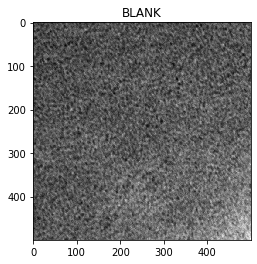

In [10]:
rng = np.random.randint(len(trainingSet))

plt.imshow(trainingSet[rng][0], cmap = 'gist_gray')
plt.title(trainingSet[rng][1].upper())

prediction = probability_model.predict(np.reshape(trainingSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])

Confianza de blank: 0.00020594573
Confianza de other: 0.99233633
Confianza de coronaviridae: 0.007457688

Clase con mayor confianza:  other


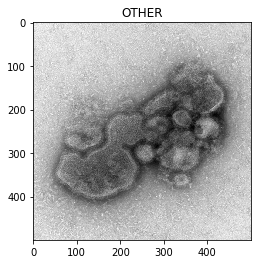

In [11]:
rng = np.random.randint(len(trainingSet))

plt.imshow(trainingSet[rng][0], cmap = 'gist_gray')
plt.title(trainingSet[rng][1].upper())

prediction = probability_model.predict(np.reshape(trainingSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])

## Evaluar con imágenes ajenas al entrenamiento

En este caso se puede considerar como una prueba de evaluación real, ya que se utilizan imágenes desconocidas para el modelo.

In [12]:
loss, acc = model.evaluate(testData,  testLabel, verbose=0)

In [13]:
print("Precisión del modelo sobre datos desconocidos: " +  str(acc*100) +  "%")

Precisión del modelo sobre datos desconocidos: 83.33333134651184%


Confianza de blank: 0.9982999
Confianza de other: 8.35205e-07
Confianza de coronaviridae: 0.0016992697

Clase con mayor confianza:  blank


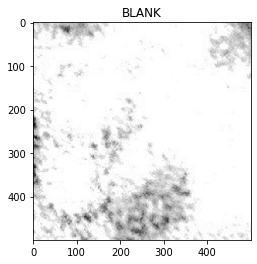

In [14]:
rng = np.random.randint(len(evaluationSet))

plt.imshow(evaluationSet[rng][0], cmap = 'gist_gray')
plt.title(evaluationSet[rng][1].upper())

prediction = probability_model.predict(np.reshape(evaluationSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])

Confianza de blank: 1.9783441e-13
Confianza de other: 0.9997718
Confianza de coronaviridae: 0.00022828217

Clase con mayor confianza:  other


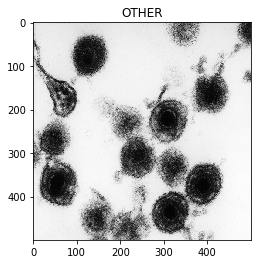

In [15]:
rng = np.random.randint(len(evaluationSet))

plt.imshow(evaluationSet[rng][0], cmap = 'gist_gray')
plt.title(evaluationSet[rng][1].upper())

prediction = probability_model.predict(np.reshape(evaluationSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])

Confianza de blank: 0.013887938
Confianza de other: 0.062597446
Confianza de coronaviridae: 0.9235146

Clase con mayor confianza:  coronaviridae


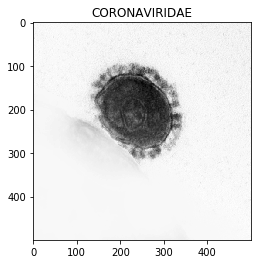

In [16]:
rng = np.random.randint(len(evaluationSet))

plt.imshow(evaluationSet[rng][0], cmap = 'gist_gray')
plt.title(evaluationSet[rng][1].upper())
rng
prediction = probability_model.predict(np.reshape(evaluationSet[rng][0], (1, 500, 500, 1)))
print('Confianza de ' + className[0] + ':', prediction[-1][0])
print('Confianza de ' + className[1] + ':', prediction[-1][1])
print('Confianza de ' + className[2] + ':', prediction[-1][2])
print('\nClase con mayor confianza: ', className[np.argmax(prediction[-1])])